#### Importing required Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV 
from IPython.display import Image 
import seaborn as sns

#### Loading the Data Set

In [2]:
df=pd.read_csv("C:\\Users\\rupan\\OneDrive - stu.aud.ac.in\\Desktop\\data_sets\\data sets\\titanic\\train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Checking shape of data

In [4]:
df.shape

(891, 12)

#### Dropping irrelevant columns

In [6]:
df.drop(columns=["PassengerId","Name","Cabin","Ticket"],inplace=True)

In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


#### checking missing values

<AxesSubplot:>

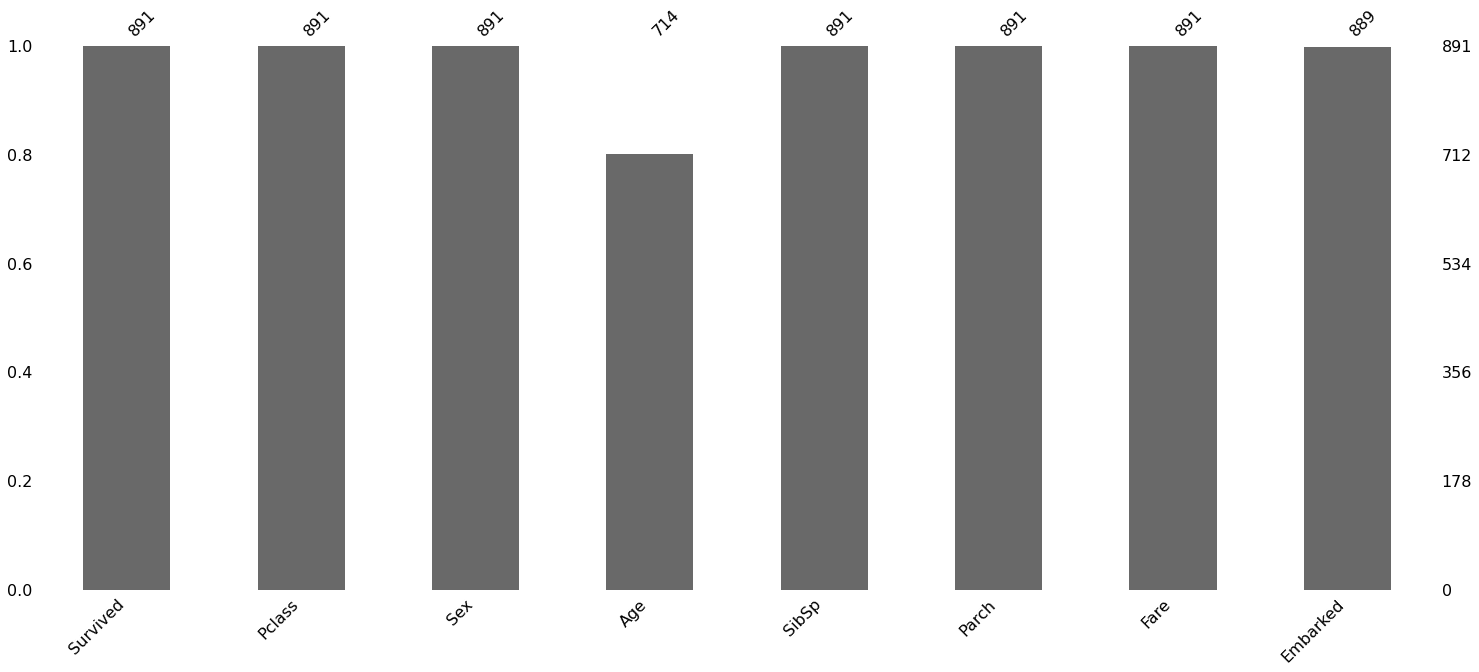

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


#### Filling the missing values

In [12]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [13]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

#### Encoding

In [15]:
df["Sex"].replace({"male":0,"female":1},inplace=True)

In [16]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [17]:
df["Embarked"].replace({"S":0,"C":1,"Q":2},inplace=True)

#### Seggregate X and Y

In [18]:
x=df.drop(columns="Survived")
y=df["Survived"]

#### Checking class imbalance

In [20]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

- No class imbalance

#### Dividing the data set into train and test

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=3)

#### Getting shape of train and test Data

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(668, 7)
(668,)
(223, 7)
(223,)


In [22]:
clf=DecisionTreeClassifier() ## Taking default parameter values max_depth=5 and  
clf.fit(x_train,y_train)

DecisionTreeClassifier()

#### Prediction

In [23]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

#### Accuracy on Test

In [24]:
acc=accuracy_score(y_test,y_pred)
acc

0.7668161434977578

#### Confusion Matrix

In [25]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[110,  27],
       [ 25,  61]], dtype=int64)

#### F1 Score

In [37]:
f1=f1_score(y_test,y_pred,average="weighted")
f1

0.801238779589852

#### Accuracy on training

In [26]:
y_pred_train=clf.predict(x_train)

In [27]:
accuracy_score(y_train,y_pred_train)

0.9835329341317365

- Train accuracy is 98 and test accuracy is 76.
- High variance, need to tune the hyperparameters

#### Tree visualization

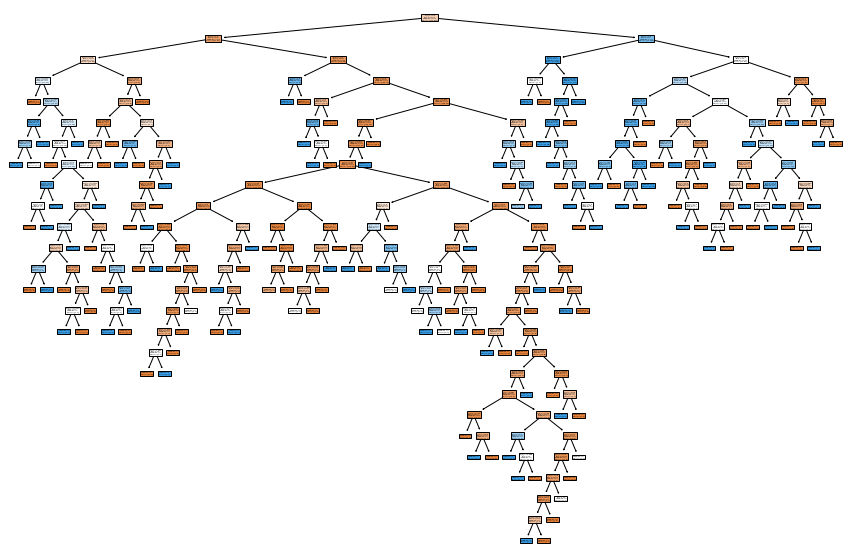

In [28]:
fig=plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()
fig.savefig("titanic_tree.png")

####  hyperparameter Tuning

#### Seeing combination of hyperparameters by grid_search

In [29]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [38]:
grid_search = GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose=1) 

In [39]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 8640 candidates, totalling 43200 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=1)

In [40]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 7, 'splitter': 'random'}


In [85]:
grid_search.best_score_  ## accuracy on training

0.838289754236337

In [86]:
treemodel = DecisionTreeClassifier(criterion ='gini', max_depth=19, min_samples_leaf= 1, min_samples_split= 7, splitter= 'random')                           

In [90]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=19, min_samples_split=7, splitter='random')

In [91]:
y_pred=treemodel.predict(x_test)

In [92]:
accuracy_score(y_test,y_pred)

0.8161434977578476

## Random Forest

#### Model fitting using random forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rclf=RandomForestClassifier() 

In [94]:
rclf.fit(x_train,y_train)

RandomForestClassifier()

In [95]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1], dtype=int64)

In [97]:
acc=accuracy_score(y_test,y_pred)
acc

0.7668161434977578

- Seems same accuracy on same data than decision tree with out hyper parameter tuning.

#### Hyper parameter tuning

In [99]:
n_estimators=[1,2,3,4,8,15,16,32,64,100,200,300]
accuracy=[]
for i in n_estimators:
    rfc=RandomForestClassifier(n_estimators=i,n_jobs=-1)
    rfc.fit(x_train,y_train)
    y_pred=rfc.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    accuracy.append(ac)
print(accuracy)

[0.7802690582959642, 0.7623318385650224, 0.7488789237668162, 0.8026905829596412, 0.7802690582959642, 0.7892376681614349, 0.8071748878923767, 0.7847533632286996, 0.7847533632286996, 0.7937219730941704, 0.7892376681614349, 0.8026905829596412]


In [102]:
import matplotlib.pyplot as plt

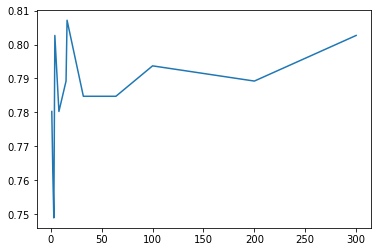

In [103]:
plt.plot(n_estimators,accuracy)

In [104]:
rfc=RandomForestClassifier(n_jobs=-1,oob_score=True)

In [105]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True)

#### OOB will tell train accuracy only.

In [110]:
rfc.oob_score_   ## accuracy after cross validation

0.812874251497006

In [106]:
ac=accuracy_score(y_test,y_pred)
ac

0.8026905829596412